In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [65]:
import cv2

In [66]:
spidey_hands = os.listdir('spidey_hands')
spidey_hands
normal_hands = os.listdir('Hands')
normal_hands

['Screenshot 2023-06-19 141903.png',
 'Screenshot 2023-06-19 141906.png',
 'Screenshot 2023-06-19 141914.png',
 'Screenshot 2023-06-19 141918.png',
 'Screenshot 2023-06-19 141921.png',
 'Screenshot 2023-06-19 141923.png',
 'Screenshot 2023-06-19 141929.png',
 'Screenshot 2023-06-19 141933.png',
 'Screenshot 2023-06-19 141937.png',
 'Screenshot 2023-06-19 141940.png',
 'Screenshot 2023-06-19 141943.png',
 'Screenshot 2023-06-19 141947.png',
 'Screenshot 2023-06-19 141949.png',
 'Screenshot 2023-06-19 141953.png',
 'Screenshot 2023-06-19 141956.png',
 'Screenshot 2023-06-19 142001.png',
 'Screenshot 2023-06-19 142005.png',
 'Screenshot 2023-06-19 142008.png',
 'Screenshot 2023-06-19 142011.png',
 'Screenshot 2023-06-19 142015.png',
 'Screenshot 2023-06-19 142020.png',
 'Screenshot 2023-06-19 142023.png',
 'Screenshot 2023-06-19 142026.png',
 'Screenshot 2023-06-19 142029.png',
 'Screenshot 2023-06-19 142032.png',
 'Screenshot 2023-06-19 142037.png',
 'Screenshot 2023-06-19 142040.png',
 

In [67]:
normal_hands_labels = np.zeros(len(normal_hands))
spidey_hand_labels = np.ones(len(spidey_hands))
labels = np.concatenate((normal_hands_labels, spidey_hand_labels), axis=0)
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

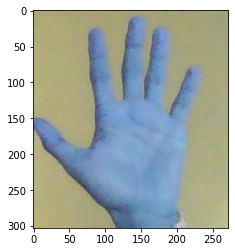

In [68]:
img1 =cv2.imread(f'hand_images/{normal_hands[0]}')
plt.imshow(img1)

In [69]:
data = []
for i in normal_hands:
    img = cv2.imread(f'hand_images/{i}')
    img = cv2.resize(img, (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(img)
for i in spidey_hands:
    img = cv2.imread(f'spidey_hands/{i}')
    img = cv2.resize(img, (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(img)
    

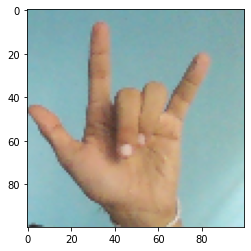

In [70]:
plt.imshow(data[-1])

Converting the images list to numpy images

In [71]:
data[0].shape, type(data)

((100, 100, 3), list)

In [72]:
array_data = np.array(data)

In [73]:
array_data.shape

(75, 100, 100, 3)

In [74]:
array_data[0].shape

(100, 100, 3)

In [75]:
array_data = array_data/255

In [76]:
array_data[0]

array([[[0.45490196, 0.65882353, 0.65490196],
        [0.4627451 , 0.65882353, 0.65490196],
        [0.4627451 , 0.65882353, 0.6627451 ],
        ...,
        [0.43921569, 0.62352941, 0.62352941],
        [0.46666667, 0.63137255, 0.63529412],
        [0.4745098 , 0.62352941, 0.63137255]],

       [[0.46666667, 0.6627451 , 0.65882353],
        [0.46666667, 0.6627451 , 0.65882353],
        [0.47058824, 0.65882353, 0.6627451 ],
        ...,
        [0.47058824, 0.63137255, 0.63529412],
        [0.47843137, 0.62745098, 0.63529412],
        [0.49411765, 0.63137255, 0.63921569]],

       [[0.45490196, 0.6627451 , 0.65882353],
        [0.4627451 , 0.65882353, 0.65882353],
        [0.4627451 , 0.65882353, 0.6627451 ],
        ...,
        [0.47843137, 0.63137255, 0.63137255],
        [0.49019608, 0.63529412, 0.63921569],
        [0.49411765, 0.63921569, 0.63921569]],

       ...,

       [[0.48235294, 0.69411765, 0.73333333],
        [0.4745098 , 0.69411765, 0.7254902 ],
        [0.46666667, 0

In [77]:
x_train, x_test, y_train, y_test = train_test_split(array_data, labels, test_size=0.2, random_state=42)

In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60, 100, 100, 3), (15, 100, 100, 3), (60,), (15,))

# Building the convolution Neural Network(CNN)

In [79]:
import tensorflow as tf
from tensorflow import keras

In [80]:
x_train[0].shape

(100, 100, 3)

In [81]:
num_of_classes = 2
model = keras.Sequential()
# Adding the first CNN layers
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
# adding the second CNN with maxx pooling
model.add(keras.layers.MaxPooling2D(2,2))

# Adding the third CNN layer
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

# Adding the fourth CNN layer with max pooling
model.add(keras.layers.MaxPooling2D(2,2))

# adding the flatten layer
model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(128, activation='relu'))


model.add(keras.layers.Dropout(0.5))


# Adding the first dense layer
model.add(keras.layers.Dense(64, activation='relu'))

# Droupout layer
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=num_of_classes, activation='softmax'))



In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 33856)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Training the CNN

In [83]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2/2 [==============================] - 3s 566ms/step - loss: 0.8317 - accuracy: 0.5000 - val_loss: 0.7248 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 1s 347ms/step - loss: 1.3610 - accuracy: 0.4000 - val_loss: 0.6943 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 1s 315ms/step - loss: 0.7003 - accuracy: 0.6167 - val_loss: 0.7438 - val_accuracy: 0.4000
Epoch 4/10
2/2 [==============================] - 1s 321ms/step - loss: 0.7108 - accuracy: 0.5833 - val_loss: 0.7158 - val_accuracy: 0.4000
Epoch 5/10
2/2 [==============================] - 1s 364ms/step - loss: 0.6675 - accuracy: 0.5667 - val_loss: 0.6981 - val_accuracy: 0.4000
Epoch 6/10
2/2 [==============================] - 1s 401ms/step - loss: 0.7339 - accuracy: 0.4833 - val_loss: 0.6892 - val_accuracy: 0.4000
Epoch 7/10
2/2 [==============================] - 1s 423ms/step - loss: 0.6614 - accuracy: 0.6500 - val_loss: 0.6875 - val_accuracy: 0.4000
Epoch 8/10
2/2 [===============

In [85]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 186ms/step


In [86]:
y_pred = np.argmax(y_pred, axis=1)

In [87]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [88]:
y_test

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.])

In [89]:
# import confusion matrix, accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

In [90]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)


In [91]:
cm, acc

(array([[0, 9],
        [0, 6]], dtype=int64),
 0.4)

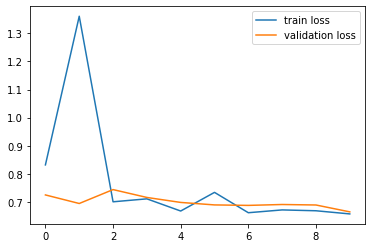

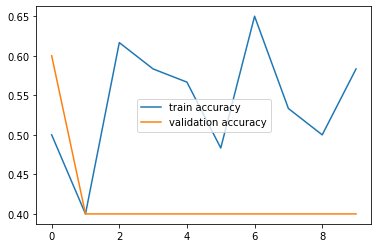

In [92]:
# plot the loss value
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy values
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [93]:
new_img = cv2.imread('hands.png')
new_img = cv2.resize(new_img, (100,100))
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
new_img = np.expand_dims(new_img, axis=0)
new_img = new_img/255
model.predict(new_img) 


1/1 [==============================] - 0s 50ms/step


array([[0.49560118, 0.5043988 ]], dtype=float32)

In [94]:
import cv2
import numpy as np

# Load your pre-trained CNN model

# Define the desired dimensions
desired_width = 100
desired_height = 100

# Initialize the webcam
video_capture = cv2.VideoCapture(0)  # 0 represents the default webcam device

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = video_capture.read()

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)

    # Resize the frame to match the desired dimensions
    resized_frame = cv2.resize(frame, (desired_width, desired_height))

    # Convert the image to RGB format
    resized_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    # Convert the image to numpy array
    # resized_frame = np.asarray(resized_frame)

    # Expand dimensions to match the input shape of your CNN model
    resized_frame = np.expand_dims(resized_frame, axis=0)

    # Normalize pixel values
    resized_frame = resized_frame / 255.0

    # Pass the preprocessed frame through your CNN model for person detection
    predictions = model.predict(resized_frame)
    print(f"This is x: {predictions}")
    y = np.argmax(predictions, axis=1)
    if y == 0:
        print('Normal Hand')
    # else:
    #     print('Normal Hand')

    # Display the frame with overlays or visual indicators of person detection
    cv2.imshow('Hand Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the windows
video_capture.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 22ms/step
This is x: [[0.41085756 0.58914244]]
1/1 [==============================] - 0s 37ms/step
This is x: [[0.41495055 0.5850494 ]]
1/1 [==============================] - 0s 39ms/step
This is x: [[0.41395918 0.5860409 ]]
1/1 [==============================] - 0s 34ms/step
This is x: [[0.41872442 0.5812756 ]]
1/1 [==============================] - 0s 29ms/step
This is x: [[0.4187705 0.5812295]]
1/1 [==============================] - 0s 26ms/step
This is x: [[0.42063668 0.5793633 ]]
1/1 [==============================] - 0s 29ms/step
This is x: [[0.42100707 0.578993  ]]
1/1 [==============================] - 0s 50ms/step
This is x: [[0.4205931 0.5794069]]
1/1 [==============================] - 0s 40ms/step
This is x: [[0.42079282 0.5792072 ]]
1/1 [==============================] - 0s 38ms/step
This is x: [[0.42066953 0.5793305 ]]
1/1 [==============================] - 0s 40ms/step
This is x: [[0.42102343 0.5789765 ]]
1/1 [====================